# UCI Machine Learning data set
# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
df= pd.read_csv("spam.csv",encoding='latin-1')

In [9]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [10]:
df.shape

(5572, 5)

# Data cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Drop last 3 columns

In [13]:
df=df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=0)
# df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [14]:
df.sample(5)

,v1,v2
4560,ham,Good afternoon my boytoy. How goes that walkin...
4974,ham,Yar... I tot u knew dis would happen long ago ...
1529,ham,Should I have picked up a receipt or something...
1291,ham,Hey babe! I saw you came online for a second a...
3906,ham,No that just means you have a fat head


In [15]:
# remane the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [16]:
df.sample(2)

,target,text
1022,ham,We still on for tonight?
4844,ham,Missing you too.pray inshah allah


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [18]:
df['target']=encoder.fit_transform(df['target'])

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [22]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()
df.shape

(5169, 2)

# EDA

In [23]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

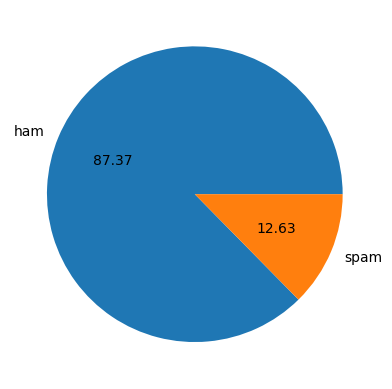

In [24]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [25]:
# data is imblanced

In [27]:
pip install nltk

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     -------------------------------------- 41.5/41.5 kB 978.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB 6.0 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.5 MB 5.8 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.5 MB 6.0 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.5 MB 5.9 MB/s eta 0:00:01
   ------------------------------------ --- 1.4/1.5 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/273.6 kB ? eta -:--:--
   -------------------------------------- - 266.2/273.6 kB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 273.6/273.6 kB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import nltk

In [29]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Patel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [30]:
df['num_chars']=df['text'].apply(len) #number of charaters used

In [31]:
df.columns

Index(['target', 'text', 'num_chars'], dtype='object')

In [32]:
#number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
df.head(3)

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [34]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
df[df['target']==0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
df[df['target']==1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_chars', ylabel='Count'>

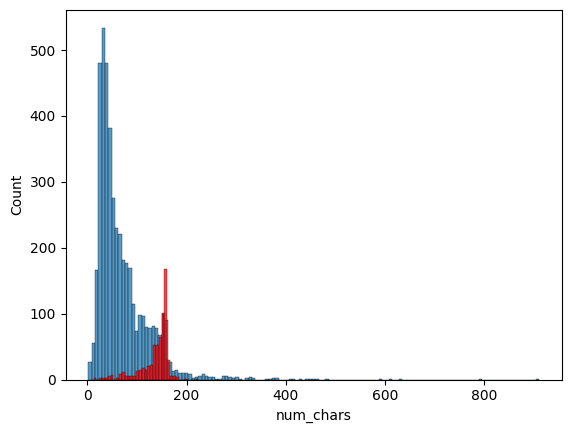

In [39]:
sns.histplot(df[df['target']==0]['num_chars'])
sns.histplot(df[df['target']==1]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

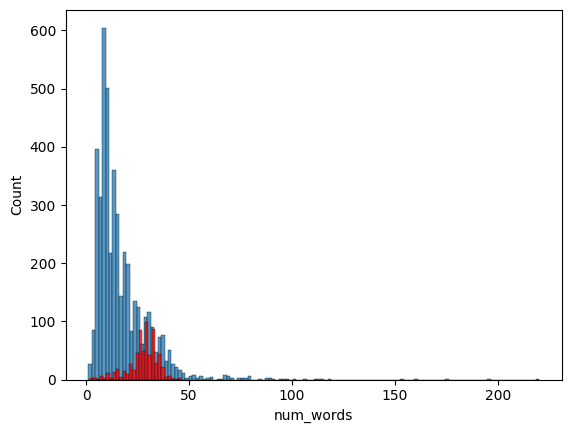

In [40]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

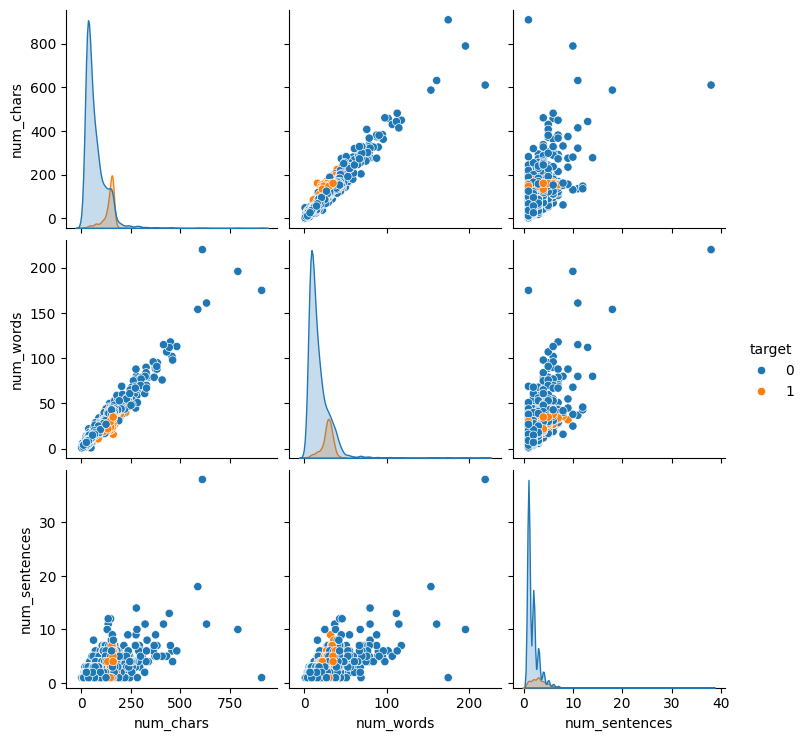

In [41]:
sns.pairplot(df,hue='target')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   target         5169 non-null   int64 
 1   text           5169 non-null   object
 2   num_chars      5169 non-null   int64 
 3   num_words      5169 non-null   int64 
 4   num_sentences  5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


<Axes: >

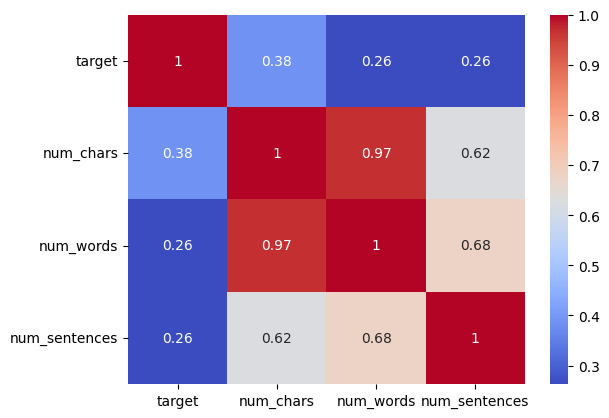

In [43]:
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [44]:
#as num_words , num_chars and num_sentence are correlated we only need to include only 1 column out of them and that should be num_chars as out of the three this column is highlu correlated to the target column(the more the number of words more are the chances of it being a spam )


# Text Preprocessing
* lower case
* tokenization
* removing special characters
* removing stop words and punctuations
* stemming

In [45]:
from nltk.corpus import stopwords

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Patel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [47]:
import string

In [48]:
from nltk.stem.porter import PorterStemmer

In [49]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  ps = PorterStemmer()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [50]:
df['transformed_text']=df['text'].apply(transform_text)

In [51]:
df.head(4)

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [53]:
pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------  297.0/301.2 kB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [55]:
wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

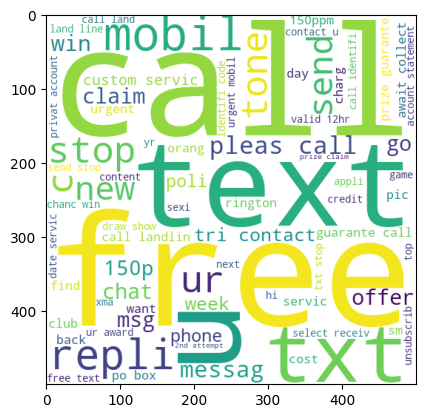

In [56]:
plt.imshow(wc)

In [57]:
nwc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [58]:
nwc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

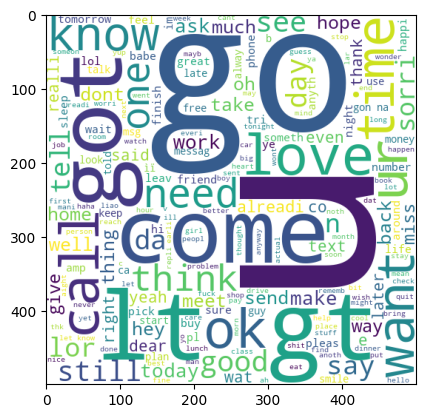

In [59]:
plt.imshow(nwc)

In [60]:
from collections import Counter

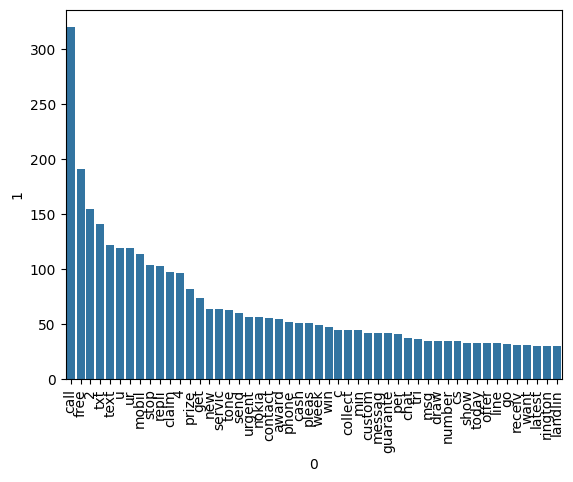

In [61]:
spam_corpus=[]
for sms in df[df['target']==1]['transformed_text'].tolist():
  for words in sms.split():
    spam_corpus.append(words)

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(50))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

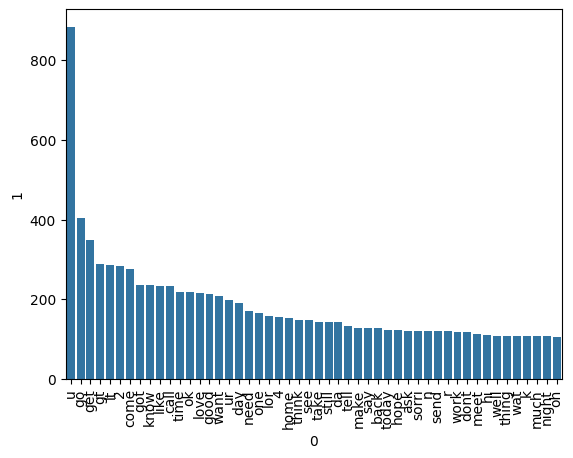

In [62]:
nospam_corpus=[]
for sms in df[df['target']==0]['transformed_text'].tolist():
  for words in sms.split():
    nospam_corpus.append(words)

sns.barplot(x=pd.DataFrame(Counter(nospam_corpus).most_common(50))[0],y=pd.DataFrame(Counter(nospam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

# model Building

In [63]:
#naivebayes is best for textual data


In [64]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer()

In [65]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [66]:
X.shape

(5169, 6708)

In [67]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
mb=MultinomialNB()
gb=GaussianNB()
bb=BernoulliNB()

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [72]:
X_train.shape
#X_test.shape
#y_train.shape
#y_test

(4135, 6708)

In [73]:
gb.fit(X_train,y_train)
y_pred1=gb.predict(X_test)

In [74]:
y_test.shape
y_pred1.shape

(1034,)

In [75]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [76]:
mb.fit(X_train,y_train)
y_pred2=mb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [77]:
bb.fit(X_train,y_train)
y_pred3=mb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [78]:
mb1=MultinomialNB()
gb1=GaussianNB()
bb1=BernoulliNB()

In [79]:
X1=tf.fit_transform(df['transformed_text']).toarray()

In [80]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [81]:
print(X1_train.shape,y1_train.shape,X1_test.shape,y1_test.shape)

(4135, 6708) (4135,) (1034, 6708) (1034,)


In [82]:
gb1.fit(X1_train,y1_train)
y1_pred1=gb1.predict(X1_test)
print(accuracy_score(y1_test,y1_pred1))
print(confusion_matrix(y1_test,y1_pred1))
print(precision_score(y1_test,y1_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [83]:
bb1.fit(X1_train,y1_train)
y1_pred2=bb1.predict(X1_test)
print(accuracy_score(y1_test,y1_pred2))
print(confusion_matrix(y1_test,y1_pred2))
print(precision_score(y1_test,y1_pred2))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [84]:
mb1.fit(X1_train,y1_train)
y1_pred3=mb1.predict(X1_test)
print(accuracy_score(y1_test,y1_pred3))
print(confusion_matrix(y1_test,y1_pred3))
print(precision_score(y1_test,y1_pred3))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [85]:
# bb1->tfidf

In [86]:
from sklearn.ensemble import ExtraTreesClassifier

In [87]:
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

In [88]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y,test_size=0.2,random_state=2)

In [89]:
etc.fit(X1_train,y1_train)

ExtraTreesClassifier(n_estimators=50, random_state=2)

In [90]:
y1_pred=etc.predict(X1_test)
print(accuracy_score(y1_test,y1_pred))
print(confusion_matrix(y1_test,y1_pred))
print(precision_score(y1_test,y1_pred))

0.9729206963249516
[[894   2]
 [ 26 112]]
0.9824561403508771


In [91]:
tfid=TfidfVectorizer(max_features=3000)
X=tfid.fit_transform(df['transformed_text']).toarray()

In [92]:
y=df['target'].values

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [94]:
etc.fit(X_train,y_train)

ExtraTreesClassifier(n_estimators=50, random_state=2)

In [95]:
y_pred=etc.predict(X_test)

In [96]:
y1_pred=etc.predict(X_test)
print(accuracy_score(y_test,y1_pred))
print(confusion_matrix(y_test,y1_pred))
print(precision_score(y_test,y1_pred))

0.9748549323017408
[[893   3]
 [ 23 115]]
0.9745762711864406


In [97]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))

# Deployment

In [98]:
%%writefile app.py

import streamlit as st
import pickle
tf=pickle.load(open('vectorizer.pkl','rb'))
model=pickle.load(open('model.pkl','rb'))

st.title("Email/SMS Spam Classifier")
input=st.text_input("Enter the message")

def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  ps = PorterStemmer()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

text=transform_text(input)
vector_input=tf.transform([text])
result=model.predict(vector_input)[0]

if result==1:
  st.header("Spam")
else:
  st.header("Not Spam")



Overwriting app.py


In [99]:
!npm install localtunnel

'npm' is not recognized as an internal or external command,
operable program or batch file.


In [100]:
!streamlit run app.py & npx localtunnel --port 8501

^C


⠙your url is: https://spicy-hats-join.loca.lt
^C


In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 1.9 MB/s eta 0:00:00
